<a href="https://colab.research.google.com/github/kiranvad/active_learning_tutorial/blob/main/submit_challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet git+https://github.com/pozzo-research-group/autophasemap.git@add_multi_kmeans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 3.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.26.1 which is incompatible.
google-ai-generativelanguage 0.6.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.1 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=

In [ ]:
!pip install --quiet git+https://github.com/kiranvad/warping.git

  Preparing metadata (setup.py) ... done


In [ ]:
!git clone https://github.com/martintb/active_learning_tutorial.git

Cloning into 'active_learning_tutorial'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 370 (delta 63), reused 62 (delta 30), pack-reused 269
Receiving objects: 100% (370/370), 2.76 MiB | 10.78 MiB/s, done.
Resolving deltas: 100% (228/228), done.


In [ ]:
%cd /content/active_learning_tutorial

/content/active_learning_tutorial


In [ ]:
!pip install --quiet -e .

  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.4/535.4 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.6/380.6 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.4 MB/s eta 0:00:00
  Building editable for tutlib (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour 

In [ ]:
!pip install protobuf>=5.26.1

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import sklearn.cluster
from sklearn.metrics import pairwise
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import Matern

import plotly.express as px
import plotly.graph_objects as go

import xarray as xr
xr.set_options(display_expand_data=False)

In [ ]:
from tutlib import *
from tutlib.instruments import starting_composition_list
from tutlib.instruments.tutorial import get_virtual_instrument as get_virtual_instrument0
from tutlib.instruments.challenge1 import get_virtual_instrument as get_virtual_instrument1
from tutlib.instruments.challenge2 import get_virtual_instrument as get_virtual_instrument2
from tutlib.instruments.challenge3 import get_virtual_instrument as get_virtual_instrument3

In [ ]:
%cd /content/active_learning_tutorial/

/content/active_learning_tutorial


In [ ]:
np.random.seed(240425)

In [ ]:
from autophasemap import multi_kmeans_run
import scipy.interpolate as interp
import os, shutil
import ray
ray.init()

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
2024-05-13 05:37:59,042	INFO worker.py:1749 -- Started a local Ray instance.


Python version:,3.10.12
Ray version:,2.21.0


# Configure Agent

The methods defined in the tutorial notebook have been blanked out here. Feel free to copy those methods as a starting point or try something new! See the "inspiration" section at the end of the notebook if you're out of ideas.



## Label

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import MinMaxScaler

noise_std_values = [5e-2, 1e-2, 1e-2]
global CHALLENGE
CHALLENGE = 1
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

class DataSet:
  def __init__(self, C, q, Iq):
    self.flags = (Iq>0.001).all(axis=0)
    self.q = q[self.flags]
    self.Iq = Iq[:,self.flags]
    self.C = C
    self.N = self.C.shape[0]
    self.n_domain = 200
    self.q_logspace = np.geomspace(self.q.min(), self.q.max(), self.n_domain)
    self.q_log = np.log10(self.q_logspace)
    self.t = (self.q_log-min(self.q_log))/(max(self.q_log)-min(self.q_log))

  def generate(self, noise_std = 1e-2):
    self.F = []
    for i in range(self.N):
      # we peform GP-based smoothing of the SAXS data
      # in the log scale to only accoount for smooth signal
      # with some potential Gaussian noise.
      # This information is usually available when obtaining SAXS/SANS
      # data at the beamlines so we think this is a valid assumption.
      x = np.log10(self.q).reshape(-1, 1)
      y = np.log10(self.Iq[i,:]).reshape(-1, 1)
      xs = self.q_log.reshape(-1, 1)
      gpr = GaussianProcessRegressor(kernel=kernel,
                                     alpha=noise_std**2,
                                     n_restarts_optimizer=9)
      gpr.fit(x_scaler.fit_transform(x), y_scaler.fit_transform(y))
      ys = gpr.predict(x_scaler.fit_transform(xs))
      ys = y_scaler.inverse_transform(ys.reshape(-1,1)).squeeze()

      self.F.append(ys)

    return

def label( dataset: xr.Dataset, num_phases: int) -> xr.Dataset:
    ''' A method which labels (classifies) the virtual scattering data

    Contract: Make the following changes to the 'dataset' variable
      - Set variables "labels" with dimension "sample"
      - Set attribute "n_phases"
    '''

    C = dataset[['a','b','c']].to_array().values.T
    data = DataSet(C, dataset["q"].values, dataset['sas'].values)
    data.generate(noise_std = noise_std_values[CHALLENGE-1])
    # create autophasemap clustering object
    # we miniize the number of runs and iterations to small number
    # so that the code can be run in a colab.
    clf,_ = multi_kmeans_run(1,
                           data,
                           num_phases,
                           max_iter=10,
                           verbose=3,
                           smoothen=False
    )
    #store results in the dataset
    dataset['labels'] = ('sample', clf.delta_n)
    dataset['labels'].attrs['description'] = 'ML-defined label for each measurement'
    dataset.attrs['n_phases'] = num_phases

    return dataset

## Extrapolate

In [ ]:
def extrapolate(dataset: xr.Dataset) -> xr.Dataset:
    ''' Extrapolate the labels from the previous step over a composition space

    Contract: Make the following changes to the 'dataset' variable
      - Set variable "labels_grid" with dimension "grid"
      - Set variable "labels_grid_prob" with dimensions ("grid","phase")
    '''
    # create and train a GP
    clf = GaussianProcessClassifier(
        kernel = Matern(
            length_scale_bounds=(0.05,0.25),
            nu=1.5
            ),
        )

    clf.fit(
        X=dataset[['c','a','b']].to_array().transpose('sample',...),
        y=dataset['labels']
    )

    # gather 'grid' of composition points to evaluate trained GP on
    Xp = dataset[['c_grid','a_grid','b_grid']].to_array().transpose('grid',...)

    # evaluate trained GP on grid
    labels_grid = clf.predict(Xp)

    # calculate entropy of prediction
    label_prob = clf.predict_proba(Xp)

    #store results in the dataset
    dataset['labels_grid_prob'] = (('grid','phase'), label_prob)
    dataset['labels_grid_prob'].attrs['description'] = 'Probability of each label at every composition of the grid'

    dataset['labels_grid'] = ('grid', labels_grid)
    dataset['labels_grid'].attrs['description'] = 'Most likely label at every composition of the grid'

    return dataset

## Acquire

In [ ]:
def choose_next_acquisition(dataset: xr.Dataset) -> xr.Dataset:
    """Use information from previous methods to decide next optimal measurement

    Contract: Make the following changes to the 'dataset' variable
      - Set variables "acquisition" with dimension "grid"
      - add a dictionary named 'next_sample' to the attributes of dataset
      - next sample should be like {'a':0.1, 'b':0.2, 'c':0.7}
    """
    # calculate the acquisition surface from the label probability of the GP.
    # In this case, we'll calculate the entropy of the mean function.
    yp = dataset['labels_grid_prob']
    acquisition = (-np.log(yp)*yp).sum('phase')

    # get index max value of acquisition surface and cast to integer
    next_sample_index = int(acquisition.argmax())

    # get composition associated with selection
    next_sample_comp = dataset[['c_grid', 'a_grid', 'b_grid']].isel(grid = next_sample_index)

    next_sample_comp_dict = {k.replace('_grid',''):v for k,v in next_sample_comp.to_pandas().to_dict().items()}
    dataset.attrs['next_sample'] = next_sample_comp_dict

    dataset["acquisition"] = acquisition #don't need to specify dimension because it's already a DataArray
    dataset["acquisition"].attrs['description'] = "acquisition/decision surface"

    return dataset

# Agent Description

Please write a description of your agent, including any specific implementation details or reasoning that went into the agent desin. This writeup will be essential for our understanding of your submission. We expect something between several sentences to a couple of paragraphs at most.

This agent used a shape-based measure for clustering SAXS curves into different phases using a tool called [autophasemap](https://github.com/pozzo-research-group/autophasemap/tree/add_multi_kmeans) that is described in detail [here](https://pubs.rsc.org/en/content/articlehtml/2023/dd/d3dd00105a).
As per implemetnation, we simply swap out the spectral clustering code with the autophasemap and the rest of the components of the active learning pipelines are kept the same.

We found that in general, the approach is very compute intensive so none of the submited results are run in colab but rather on a cluster computer. The code is provided here for as required by the competition rules.

The actual code for running this on cluster computer see [here](https://github.com/kiranvad/active_learning_tutorial)

Our approach performs competetively on controlled noise datasets and gets fairly accurate phasemaps with atleast 50 data points in the design space. However, given the computational demand of the `autophasemap` it is possible that some of the iterations got stuck at local minima thus give poor labeling of the samples into distinct phases.

# Challenge 1 - Noise

A common issue in developing active learning schemes for material science problems is that real measurement data can have significant noise. In order to be effective, your agent must be robust to measurement noise, so this first challenge is designed test this.

In [ ]:
instrument1 = get_virtual_instrument1()
instrument1._plot_ground_truth_data()

FigureWidget({
    'data': [{'a': array([ 1.        ,  0.98989899,  0.97979798, ..., -0.01      , -0.01      ,
                          -0.01      ]),
              'b': array([0.        , 0.        , 0.        , ..., 0.98994975, 0.99497487,
                          1.        ]),
              'c': array([0.        , 0.01010101, 0.02020202, ..., 0.01005025, 0.00502513,
                          0.        ]),
              'cliponaxis': False,
              'marker': {'size': 12, 'symbol': 'triangle-up'},
              'mode': 'markers',
              'type': 'scatterternary',
              'uid': 'e69ea053-3c4c-4220-b75a-c6c5a3ca0956'},
             {'a': array([ 0.3030303 ,  0.29292929,  0.28282828, ..., -0.01      , -0.01      ,
                          -0.01      ]),
              'b': array([0.19191919, 0.19191919, 0.19191919, ..., 0.80904523, 0.81407035,
                          0.81909548]),
              'c': array([0.50505051, 0.51515152, 0.52525253, ..., 0.19095477, 0.1859

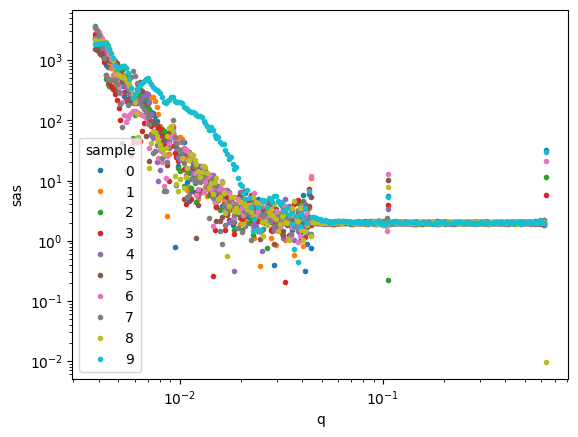

In [ ]:
input_dataset1 = instrument1.measure_multiple(starting_composition_list)
input_dataset1.sas.plot.line(x='q', xscale='log', yscale='log', marker='.', ls='none');

In [ ]:
results = actively_learn(
    niter = 2,
    num_phases=2,
    input_dataset=input_dataset1,
    label=label,
    extrapolate=extrapolate,
    choose_next_acquisition=choose_next_acquisition,
    instrument=instrument1,
    plot=True,
    plot_every=1,
    plot_skip_phases=['D'],
)

100%|██████████| 2/2 [01:47<00:00, 53.67s/it]


# Challenge 2 - Multiple Phases

Real soft materials often have multiple strucrual phases, as is the case with the study that we're borrowing these phase boundaries from. In this challenge, we test how well your agent handles a four phase problem.


In [ ]:
instrument2 = get_virtual_instrument2()
instrument2._plot_ground_truth_data()
CHALLENEGE = 2

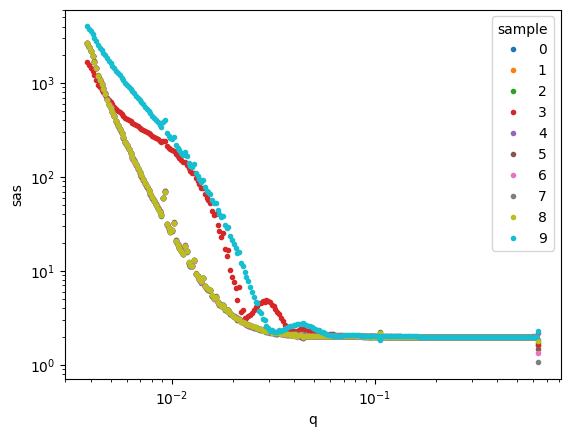

In [ ]:
input_dataset2 = instrument2.measure_multiple(starting_composition_list)
input_dataset2.sas.plot.line(x='q', xscale='log', yscale='log', marker='.', ls='none')
plt.show()

In [ ]:
results = actively_learn(
    niter = 2,
    num_phases=4,
    input_dataset=input_dataset2,
    label=label,
    extrapolate=extrapolate,
    choose_next_acquisition=choose_next_acquisition,
    instrument=instrument2,
    plot=True,
    plot_every=1,
    plot_skip_phases=['D'],
)

100%|██████████| 2/2 [02:35<00:00, 77.83s/it]


# Challenge 3 - Intra-Phase Structural Variation

Soft materials can have structrual variation within "phases". For example, a spherical phase can display variation sphere radius as a function of sample composition. Here we test whether your A.I. is robust to this non-ideality.

In [ ]:
instrument3 = get_virtual_instrument3()
instrument3._plot_ground_truth_data()
CHALLENEGE = 3

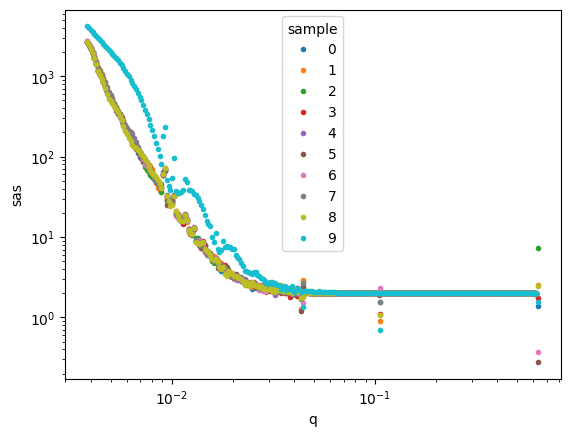

In [ ]:
input_dataset3 = instrument3.measure_multiple(starting_composition_list)
input_dataset3.sas.plot.line(x='q', xscale='log', yscale='log', marker='.', ls='none')
plt.show()

In [ ]:
results = actively_learn(
    niter = 2,
    num_phases=2,
    input_dataset=input_dataset3,
    label=label,
    extrapolate=extrapolate,
    choose_next_acquisition=choose_next_acquisition,
    instrument=instrument3,
    plot=True,
    plot_every=1,
    plot_skip_phases=['D'],
)

100%|██████████| 2/2 [01:58<00:00, 59.26s/it]
